<a href="https://colab.research.google.com/github/xtnguyen2002/Python/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Loading Datasets and Importing Libraries

In [19]:
# Importing Tensorflow and the required visualization libraries
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

#Loading the Dataset
train = pd.read_csv('/content/drive/My Drive/digit-recognizer/train.csv')
test = pd.read_csv('/content/drive/My Drive/digit-recognizer/test.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Seperating the independent feature as y
y = train['label']
train = train.drop('label', axis =1)

# Visualizing Data

<Axes: ylabel='count'>

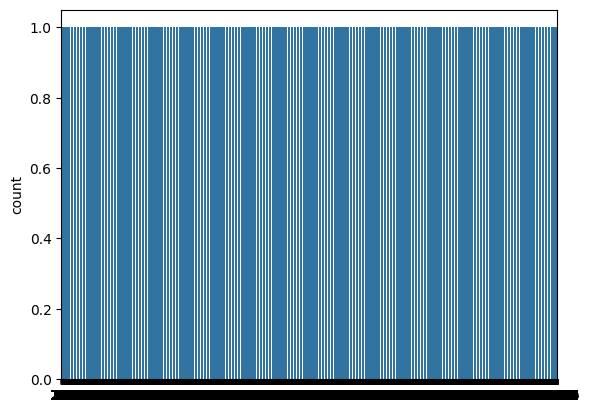

In [21]:
#Visualizing the Distribution of digits in labels
sns.countplot(y)

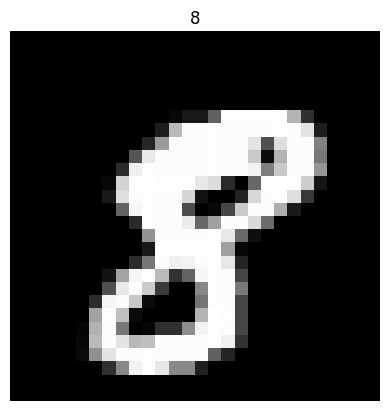

In [22]:
#Visualing an example
img = train.iloc[10].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y.iloc[10])
plt.axis("off")
plt.show()

In [24]:
!pip install pydot
!pip install graphviz
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


# Preprocessing Data

In [26]:
#Preprocessing the Data
train=train/225.0
test = test/225.0
train = np.array(train)
test= np.array(test)
train = train.reshape(train.shape[0], 28, 28,1)
test = test.reshape(test.shape[0], 28, 28,1)

#Splitting the data into training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train, y, test_size=0.2)

#Converting the train and validation labels to one-hot encodings
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_val = tf.keras.utils.to_categorical(Y_val, num_classes=10)

# Building, Compiling and Training model

In [29]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])


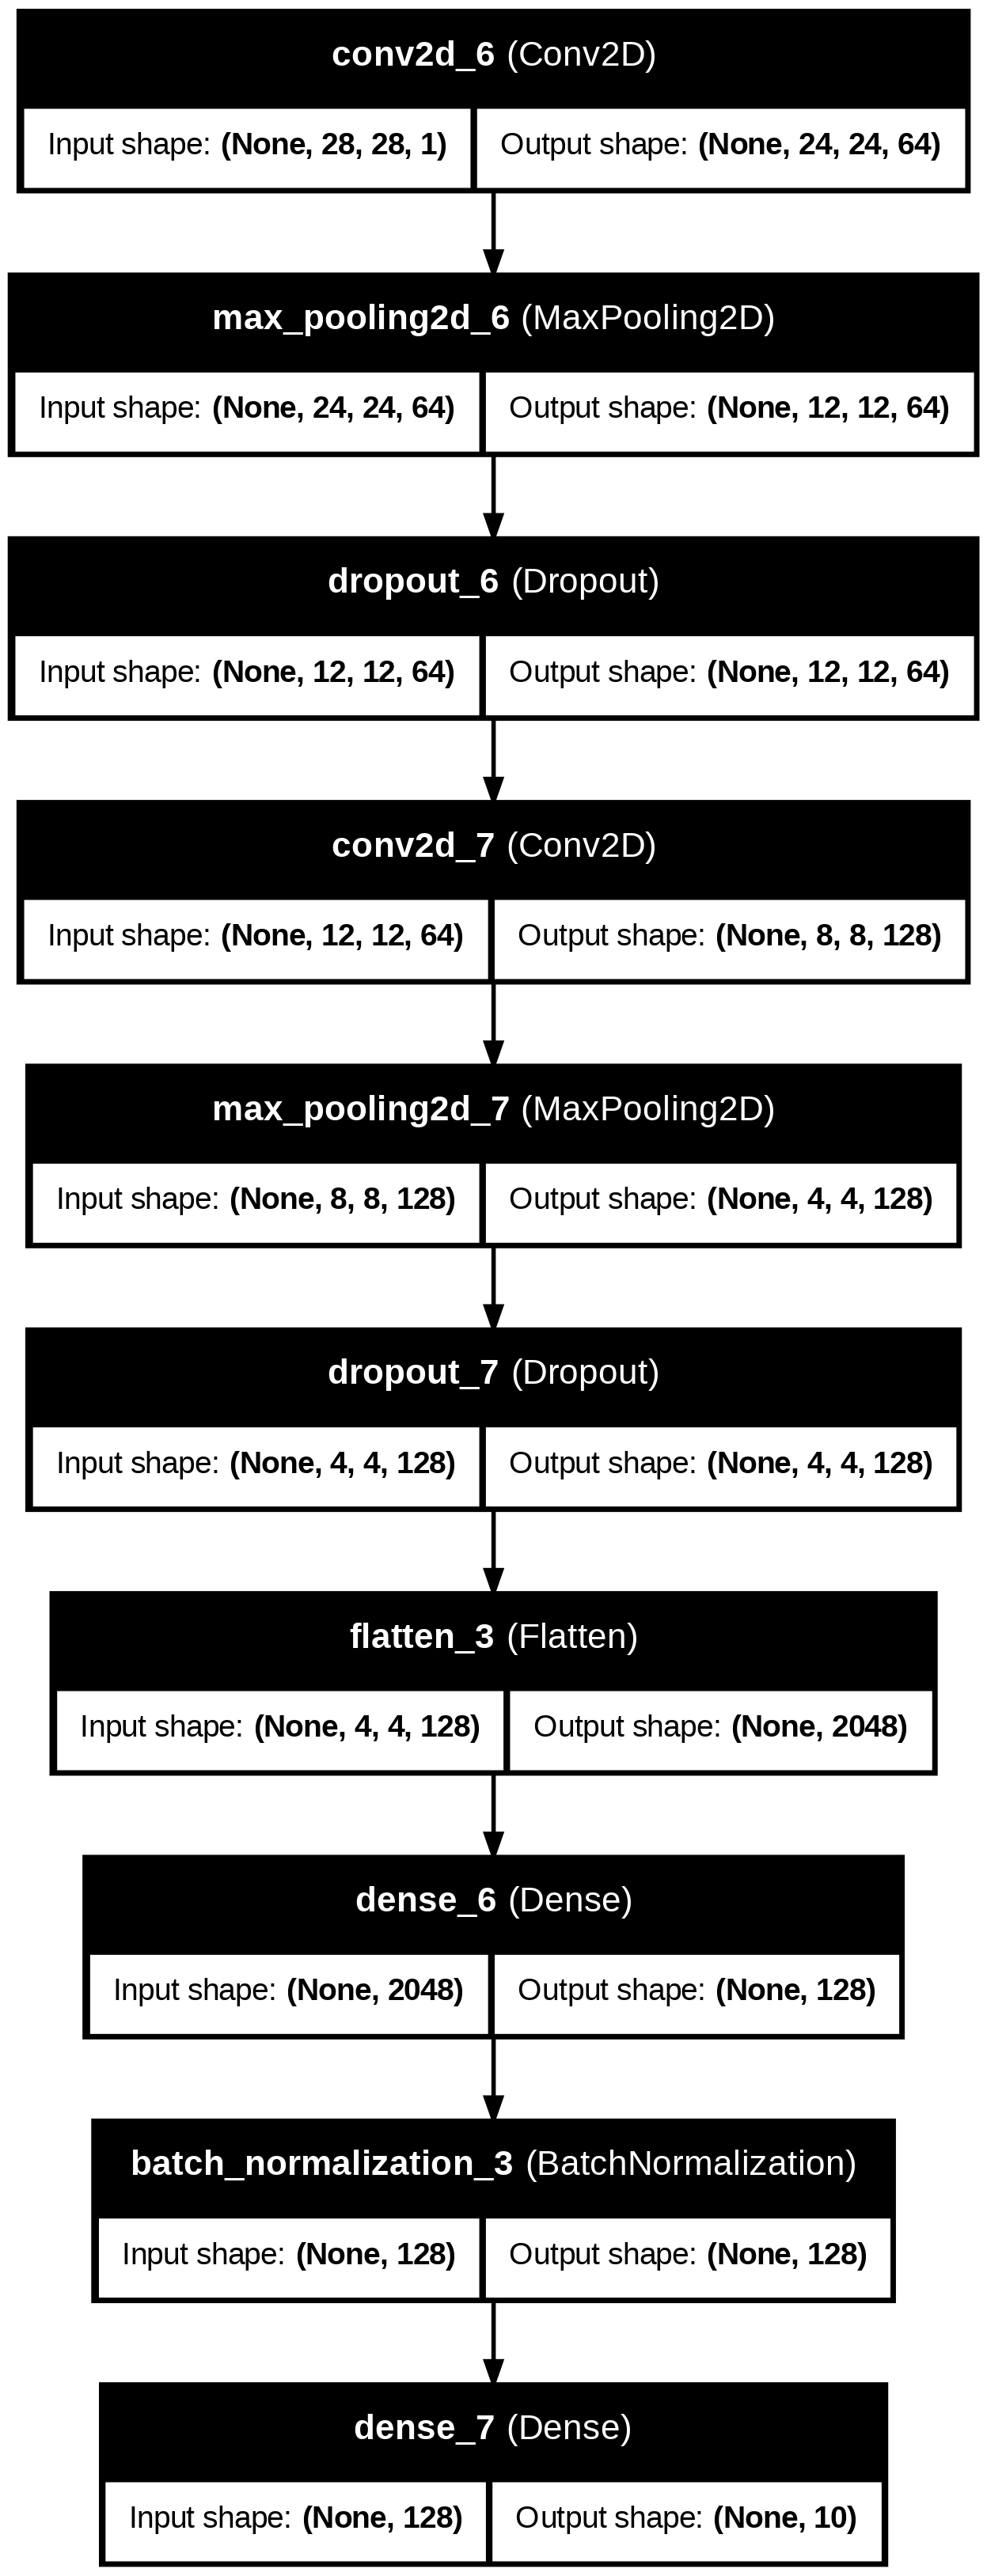

In [33]:
#Getting the model framework/summary
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,)

In [ ]:
#Training the model
history = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_val, Y_val),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


525/525 [==============================] - 67s 128ms/step - loss: 0.6285 - accuracy: 0.7963 - val_loss: 0.1322 - val_accuracy: 0.9617
Epoch 2/15
525/525 [==============================] - 71s 135ms/step - loss: 0.2306 - accuracy: 0.9285 - val_loss: 0.0807 - val_accuracy: 0.9758
Epoch 3/15
525/525 [==============================] - 66s 125ms/step - loss: 0.1779 - accuracy: 0.9441 - val_loss: 0.0624 - val_accuracy: 0.9802
Epoch 4/15
525/525 [==============================] - 66s 126ms/step - loss: 0.1523 - accuracy: 0.9526 - val_loss: 0.0355 - val_accuracy: 0.9883
Epoch 5/15
525/525 [==============================] - 66s 126ms/step - loss: 0.1396 - accuracy: 0.9569 - val_loss: 0.0393 - val_accuracy: 0.9875
Epoch 6/15
525/525 [==============================] - 65s 124ms/step - loss: 0.1250 - accuracy: 0.9609 - val_loss: 0.0418 - val_accuracy: 0.9851
Epoch 7/15
525/525 [==============================] - 67s 127ms/step - loss: 0.1156 - accuracy: 0.9641 - val_loss: 0.0406 - val_accuracy: 0.9

# Evaluating Results

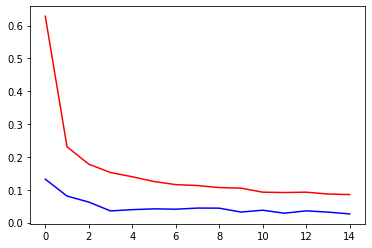

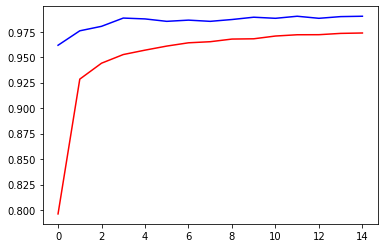

In [ ]:
#Comparing losses and accuraries
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.show()
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.show()

In [ ]:
#Plotting Confusion Matrix
y_pred1 = model.predict(X_val)
y_pred1 = np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_val, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred1)
print(cm)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[[827   0   0   1   0   0   1   0   1   0]
 [  0 959   2   1   1   0   1   2   1   0]
 [  0   2 806   7   1   0   0  10   3   0]
 [  0   0   0 887   0   0   0   2   0   0]
 [  0   1   0   0 834   0   1   0   0   3]
 [  0   0   0   6   0 755   3   0   1   0]
 [  1   0   0   0   2   2 773   0   2   0]
 [  0   1   1   0   3   0   0 863   0   1]
 [  1   0   1   2   1   0   1   0 764   6]
 [  1   0   0   1   3   1   0   1   0 849]]


# Saving the Predictions

In [ ]:
#Predicting and Saving it as a CSV file
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = pd.Series(y_pred, name='Label')
sub = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)
sub.to_csv('/content/drive/My Drive/Teaching/Data Analytics/Spring 2022/Homework/HW 4/digit-recognizer/RESULT.csv', index=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
